# Heat map of the SK model measures

In [3]:
import numpy as np
import csv
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
from pathlib import Path

In [6]:
# Simulation parameters
TD = '1e4' # tdim
CN = '1e3' # conf_num
TH = '1e4' # thermal
numparam = '51x51' # number of mu values x number of sd values

# Parameters range
mu_min = -0.002 # Minimum Average Interaction
mu_max = 0.01 # Maximum Average Interaction
mu_step = 0.00024 # Average interaction step
sd_min = 0 # Minimum interaction standard deviation
sd_max = 0.15 # Maximum interaction standard deviation
sd_step = 0.003 # Interaction sd step

mu_size = int((mu_max-mu_min)/mu_step + 1)
sd_size = int((sd_max-sd_min)/sd_step + 1)

# J avarages
mu = np.zeros((mu_size))
# J stand. dev.
sd = np.zeros((sd_size))
# SG susceptibility
Xsg = np.zeros((sd_size,mu_size))
# Uniform suscept.
Xuni = np.zeros((sd_size,mu_size))
# SG order parm
q = np.zeros((sd_size,mu_size))
# Magnetization
m = np.zeros((sd_size,mu_size))
# Specific heat
c = np.zeros((sd_size,mu_size))

In [15]:
for j in range(mu_size):
    for i in range(sd_size):
        infname = "file_%d_%d.txt" % (j,i)
        with open(infname, 'r') as file:
            reader = csv.reader(file, delimiter='\t')
            try:
                for var in reader:
                    mu[j] = float(var[0])
                    sd[i] = float(var[1])
                    Xsg[i,j] = float(var[2])
                    Xuni[i,j] = float(var[3])
                    q[i,j] = float(var[4])
                    m[i,j] = float(var[5])
                    c[i,j] = float(var[6])
            except:
                print('Error: file_%d_%d.txt has no values'%(i, j))

## Spin Glass Susceptibility

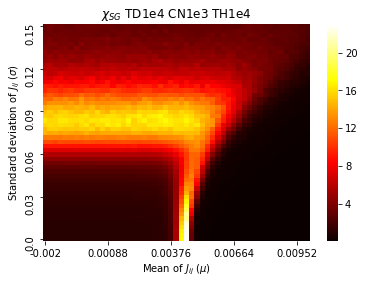

In [9]:
# SK code
df = pd.DataFrame(Xsg, columns=mu, index=sd)
ax = sns.heatmap(df, vmin=np.amin(Xsg), cmap='hot', vmax=np.amax(Xsg), xticklabels=12, yticklabels=10)
ax.invert_yaxis()
ax.set_title('$\chi_{SG}$ TD%s CN%s TH%s'%(TD,CN,TH))
plt.xlabel('Mean of $J_{ij}$ ($\mu$)')
plt.ylabel('Standard deviation of $J_{ij}$ ($\sigma$)')
plt.savefig(measuresfolder+'Xsg_TD%s_CN%s_TH%s_p%s.png'%(TD,CN,TH,numparam), dpi=400)

## Uniform Susceptibility

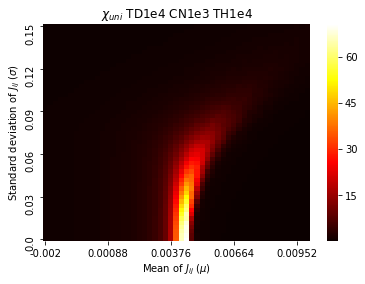

In [10]:
# SK code
df = pd.DataFrame(Xuni, columns=mu, index=sd)
ax = sns.heatmap(df, cmap='hot', vmin=np.amin(Xuni), vmax=np.amax(Xuni), xticklabels=12, yticklabels=10)
ax.invert_yaxis()
ax.set_title('$\chi_{uni}$ TD%s CN%s TH%s'%(TD,CN,TH))
plt.xlabel('Mean of $J_{ij}$ ($\mu$)')
plt.ylabel('Standard deviation of $J_{ij}$ ($\sigma$)')
plt.savefig(measuresfolder+'Xuni_TD%s_CN%s_TH%s_p%s.png'%(TD,CN,TH,numparam), dpi=400)

## Spin Glass Order Parameter

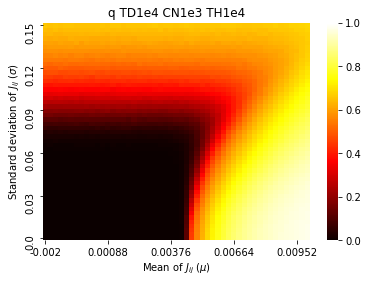

In [11]:
# SK code
df = pd.DataFrame(q, columns=mu, index=sd)
ax = sns.heatmap(df, cmap='hot', vmin=0, vmax=1, xticklabels=12, yticklabels=10)
ax.invert_yaxis()
ax.set_title('q TD%s CN%s TH%s'%(TD,CN,TH))
plt.xlabel('Mean of $J_{ij}$ ($\mu$)')
plt.ylabel('Standard deviation of $J_{ij}$ ($\sigma$)')
plt.savefig(measuresfolder+'q_TD%s_CN%s_TH%s_p%s.png'%(TD,CN,TH,numparam), dpi=400)

## Magnetization

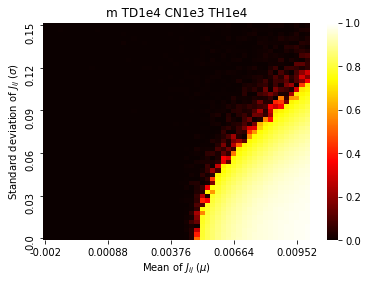

In [12]:
# SK code
df = pd.DataFrame(m, columns=mu, index=sd)
ax = sns.heatmap(df, cmap='hot', vmin=0, vmax=1, xticklabels=12, yticklabels=10)
ax.invert_yaxis()
ax.set_title('m TD%s CN%s TH%s'%(TD,CN,TH))
plt.xlabel('Mean of $J_{ij}$ ($\mu$)')
plt.ylabel('Standard deviation of $J_{ij}$ ($\sigma$)')
plt.savefig(measuresfolder+'m_TD%s_CN%s_TH%s_p%s.png'%(TD,CN,TH,numparam), dpi=400)

## Specific Heat

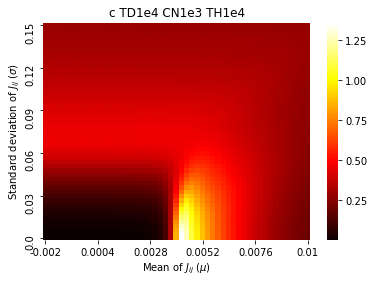

In [13]:
# SK code
df = pd.DataFrame(c, columns=mu, index=sd)
ax = sns.heatmap(df, cmap='hot', xticklabels=10, yticklabels=10)
ax.invert_yaxis()
ax.set_title('c TD%s CN%s TH%s'%(TD,CN,TH))
plt.xlabel('Mean of $J_{ij}$ ($\mu$)')
plt.ylabel('Standard deviation of $J_{ij}$ ($\sigma$)')
plt.savefig(measuresfolder+'c_TD%s_CN%s_TH%s_p25x21.png'%(TD,CN,TH), dpi=400)